In [203]:
#importing the necessary libraries required to visualize data and create the model

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
#loading the training and testing datasets

train = pd.read_csv(r"C:\Users\cppra\Santander Customer Satisfaction - TRAIN.csv")
test = pd.read_csv(r"C:\Users\cppra\Santander Customer Satisfaction - TEST-Without TARGET.csv")

In [205]:
#displaying top 5 values of training dataset

train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [206]:
#displaying top 5 values of testing dataset

test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [207]:
#displays number of rows, columns of a data frame

print(train.shape)      
print(test.shape)

(76020, 371)
(75818, 370)


In [208]:
#displays information about the columns

train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [209]:
#displays the number of null values
train.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [210]:
#displays basic columnwise statistical analysis of the dataset
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


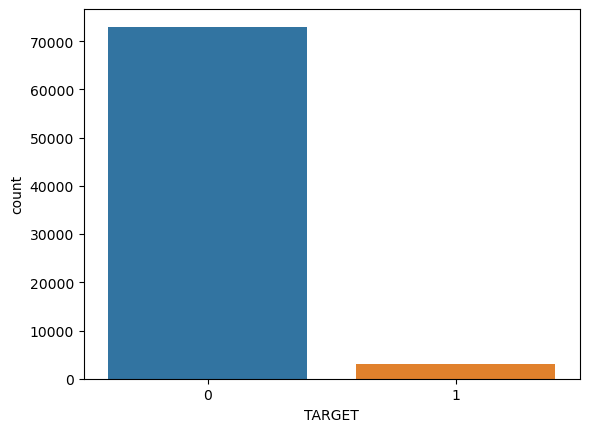

In [212]:
#bar graph showing the counts of each target value

sns.countplot(x="TARGET", data=train)
plt.show()

In [213]:
#getting list of names of all Columns from a dataframe

TrainCols = list(train.columns.values)
TestCols = list(test.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [214]:
#spilitting TARGET column from the training dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train.drop("TARGET", axis=1), train["TARGET"], test_size=0.20)
print(X_train.shape)
print(Y_train.shape)

(60816, 370)
(60816,)


In [232]:
#creating the decision tree classifier
dt = DecisionTreeClassifier()

#fitting the model on the training data
dt.fit(X_train, Y_train)

#making predictions on the test data
Y_pred = dt.predict(X_test)

#getting the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9229150223625362


In [233]:
#confusion matrix and calculating true positives, negatives and false positives, negatives.

print(metrics.confusion_matrix(Y_test, Y_pred))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_pred))

[[13934   652]
 [  520    98]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14586
           1       0.13      0.16      0.14       618

    accuracy                           0.92     15204
   macro avg       0.55      0.56      0.55     15204
weighted avg       0.93      0.92      0.93     15204



In [234]:
#plotting the decesion Tree
tree.plot_tree(dt)

[Text(0.4982832706512414, 0.9903846153846154, 'x[183] <= 2.925\ngini = 0.076\nsamples = 60816\nvalue = [58426, 2390]'),
 Text(0.22592696716562782, 0.9711538461538461, 'x[2] <= 27.5\ngini = 0.159\nsamples = 17095\nvalue = [15602, 1493]'),
 Text(0.05374628176058503, 0.9519230769230769, 'x[369] <= 46988.176\ngini = 0.048\nsamples = 8957\nvalue = [8735, 222]'),
 Text(0.01604644089837966, 0.9326923076923077, 'x[2] <= 25.5\ngini = 0.139\nsamples = 654\nvalue = [605, 49]'),
 Text(0.0076384351722378315, 0.9134615384615384, 'x[324] <= 21.0\ngini = 0.104\nsamples = 546\nvalue = [516, 30]'),
 Text(0.006722109303403303, 0.8942307692307693, 'x[369] <= 46960.965\ngini = 0.098\nsamples = 543\nvalue = [515, 28]'),
 Text(0.006263946368986038, 0.875, 'x[369] <= 13147.11\ngini = 0.095\nsamples = 542\nvalue = [515, 27]'),
 Text(0.0047534404445791194, 0.8557692307692307, 'x[0] <= 82678.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.004295277510161855, 0.8365384615384616, 'gini = 0.0\nsamples = 1\nva

In [235]:
#getting class prediction probaabilities as a dataframe
#getting prediction probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(dt.predict_proba(X_train))

pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [236]:
#calling the predict method on the decision tree classifier to make predictions on the testing dataset.

test_predictions = dt.predict(test)

In [237]:
#creating submission file to upload in Kaggle

submission = pd.DataFrame({'ID': test['ID'], 'TARGET': test_predictions})
submission.to_csv('submission_4.csv', index=False)